<a href="https://colab.research.google.com/github/choyoona/AI-IoT/blob/main/cnn_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 이전 DNN 코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Input

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


W0821 00:48:13.984249 140281580390272 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
Total params: 8,070
Trainable params: 8,070
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
60000/60000 [==============================] - 1s 20us/sample - loss: 0.7731 - acc: 0.7749
Epoch 2/5
60000/60000 [==============================] - 1s 19us/sample - loss: 0.3412 - acc: 0.9015
Epoch 3/5
60000/60000 [===========================

# CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

In [ ]:
(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_6 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d_22 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 28, 28, 32)        0         
                                                                 
 conv2d_23 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                      

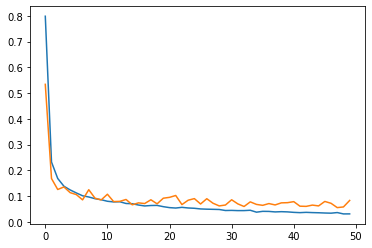

313/313 [==============================] - 1s 4ms/step - loss: 0.0902 - accuracy: 0.9739
loss= 0.09024517238140106
acc= 0.9739000201225281
[7 2 1 ... 4 5 6]


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout, GaussianNoise

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1))) # ADDED
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(32, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Conv2D(64, (3, 3), padding='same')) # ADDED
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(MaxPooling2D((2, 2))) # ADDED
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax')) 
model.add(BatchNormalization())
model.add(Dropout(0.1)) 


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


# model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)
history = model.fit(train_x, train_y, epochs=50, verbose=1, batch_size=128, validation_split=0.1)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


conv2d 레이어의 파라매터 수는 다음에 의해서 결정된다.
```
파라매터 수 = (conv필터 가로 * conv 필터 세로 * 데이터 깊이 + bias 1개) * 필터 수
```
위 모델의 경우 파라매터 수 320, 18496은 다음과 같이 결정된다.

```
320 = (3*3*1+1) * 32

18496 = (3*3*32+1)*64
```

```
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
=================================================================
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
```

# 영상 데이터 분류 CNN Template

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Input, Reshape

import time

(raw_train_x, raw_train_y), (raw_test_x, raw_test_y) = tf.keras.datasets.mnist.load_data()

train_x = raw_train_x/255.
test_x = raw_test_x/255.

train_y = raw_train_y
test_y = raw_test_y

model = keras.Sequential()
model.add(Input((28,28)))
model.add(Reshape((28,28,1)))
model.add(Conv2D(32, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


model.fit(train_x, train_y, epochs=5, verbose=1, batch_size=128)


loss, acc = model.evaluate(test_x, test_y)
print("loss=",loss)
print("acc=",acc)

y_ = model.predict(test_x)
predicted = np.argmax(y_, axis=1)

print(predicted)


11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________